# Week 5 - Ordinations and Evolution plots

### Contents
1. [Faceting graphs](#1)
2. [PCA ordination](#2)
3. [Line plot](#3)
4. [Area plot](#4)
5. [Stacked area plot](#5)

### Loading packages

In [1]:
library(ggplot2)
library(datasets)
library(vegan)
library(ggpubr)
library(reshape2)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



### Load data

In [2]:
data(mtcars)
data(iris)
data(economics)

### Set theme

In [3]:
theme_set(theme_bw() + theme(panel.grid = element_blank()))

<a name = "1" ></a>
### Faceting graphs
Faceting graphs is a method for splitting data into separate graphs by a group. In the code below we will plot the same line graph as last week (weight by mpg) and then facet or separate those data points into separate graphs by cylinders (cyl). The `scales = "free"` tells ggplot to automattically adjust the scales to best fit each panel spearately. This may be useful depending on what you're trying to visualize or it may be deceptive to create different scales, it all depends on what is most useful for your data. 

`geom_smooth()` using formula = 'y ~ x'


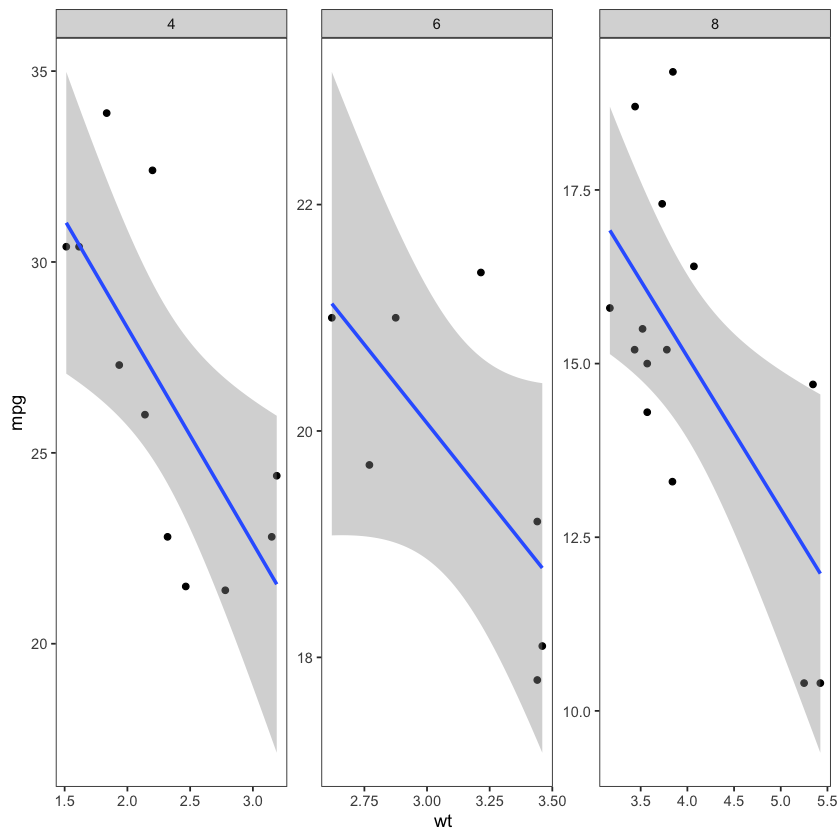

In [4]:
ggplot(mtcars, aes(wt, mpg)) + geom_point() + geom_smooth(method = "lm") + 
facet_wrap(~cyl, scales = "free")

Because `facet_wrap()` only sorts data by one variable, you can designate the arrangement of panels using `nrow =` and `ncol =`. Each of these takes integers as input for the number of rows and number of columns you want the panels to display in. 

`geom_smooth()` using formula = 'y ~ x'


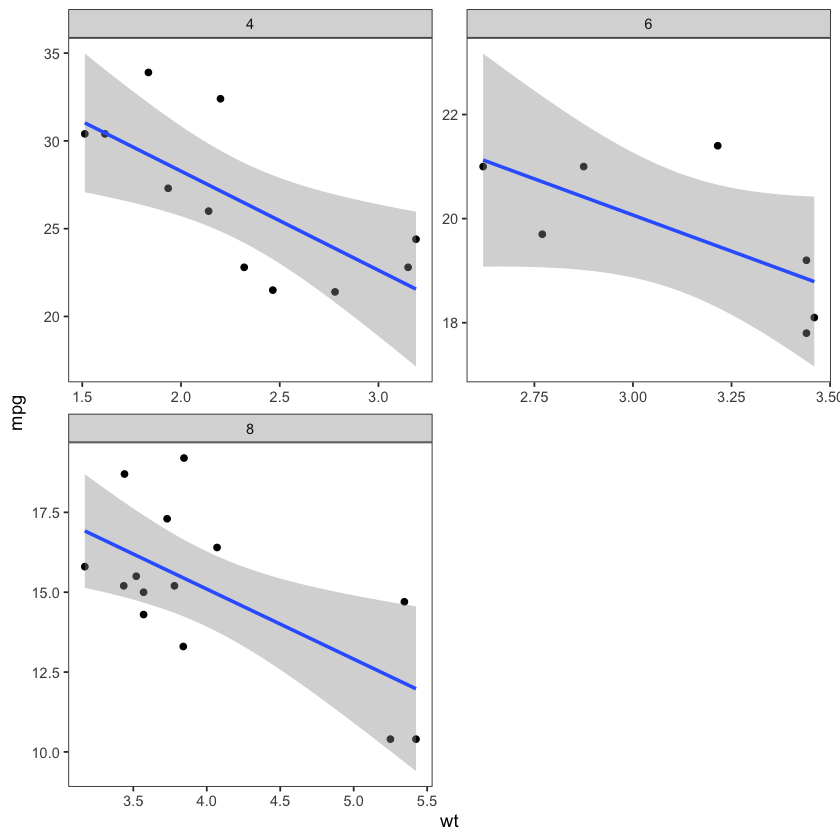

In [5]:
ggplot(mtcars, aes(wt, mpg)) + geom_point() + geom_smooth(method = "lm") + 
facet_wrap(~cyl, scales = "free", nrow = 2, ncol = 2)

An alternate way to facet plots is to do it using `facet_grid()`. The biggest difference between `facet_grid()` and `facet_wrap()` is that `facet_grid()` can take two categorical variables to sort data by. So in the example of cars, if this data set also had car model as a variable we could use `facet_grid(model~cyl)` to create a plot with rows of panels representing model and the columns of panels representing number of cylinders.

Additionally, we can customize the appearance of the facet headers using `theme()` as we have done with other aspects of the plot. The command below demonstrates how to use "strip" features to edit the fill of the facet header and the text formatting. While we have gone over adjusting text color and face (bold, italic, etc) in previous scripts, we added the `family =` variable here to add another layer of customization. The `family =` option takes either "sans", "serif", or "mono" as input. "sans" results in Arial font, "serif" results in Times New Roman font, and "mono" results in Courier New font.

`geom_smooth()` using formula = 'y ~ x'


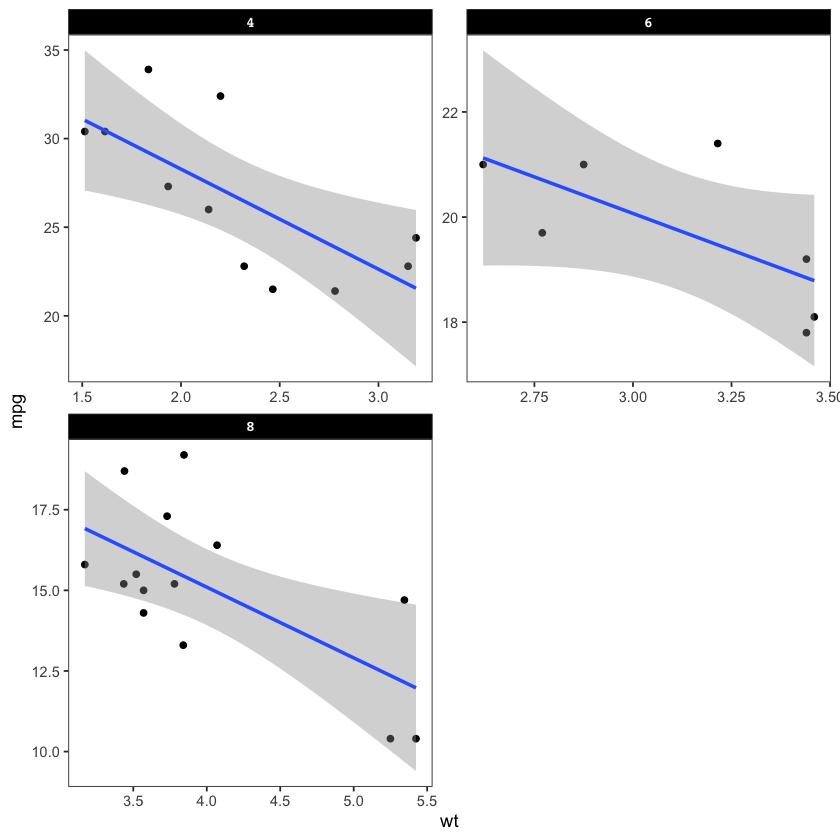

In [6]:
ggplot(mtcars, aes(wt, mpg)) + geom_point() + geom_smooth(method = "lm") + 
facet_wrap(~cyl, scales = "free", nrow = 2, ncol = 2) +
theme(strip.background = element_rect(fill = "black"), strip.text = element_text(color = "white", face = "bold", family = "mono"))

<a name = 2></a>
### PCA Ordination
A Principal Components Analysis (PCA) is one example of an ordination method to analyze multivariate data. Here we are going to start by running a PCA on the iris dataset using the `prcomp()` command in the vegan package. We name the PCA to save it as an object in our environment that we can then use as input for future commands. The first command below is first going to show a preview of the data and the second commands separate only the numeric data from the iris dataset and show a preview of the filtered data.

In [7]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [8]:
iris_numeric <- iris[1:4]
head(iris_numeric)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


Next, we use the `prcomp()` function from vegan to run the PCA on just the numeric data. The `summary()` command then summarizes the statistics associated with the PCA and gives us information such as the proportion of variance explained along each component.

In [9]:
pca <- prcomp(iris_numeric)
summary(pca)

Importance of components:
                          PC1     PC2    PC3     PC4
Standard deviation     2.0563 0.49262 0.2797 0.15439
Proportion of Variance 0.9246 0.05307 0.0171 0.00521
Cumulative Proportion  0.9246 0.97769 0.9948 1.00000

Now that we have a PCA object, we are going to plot the PCA using a base R command. The `plot()` command will plot the proportions of variance explained on each PC axis.

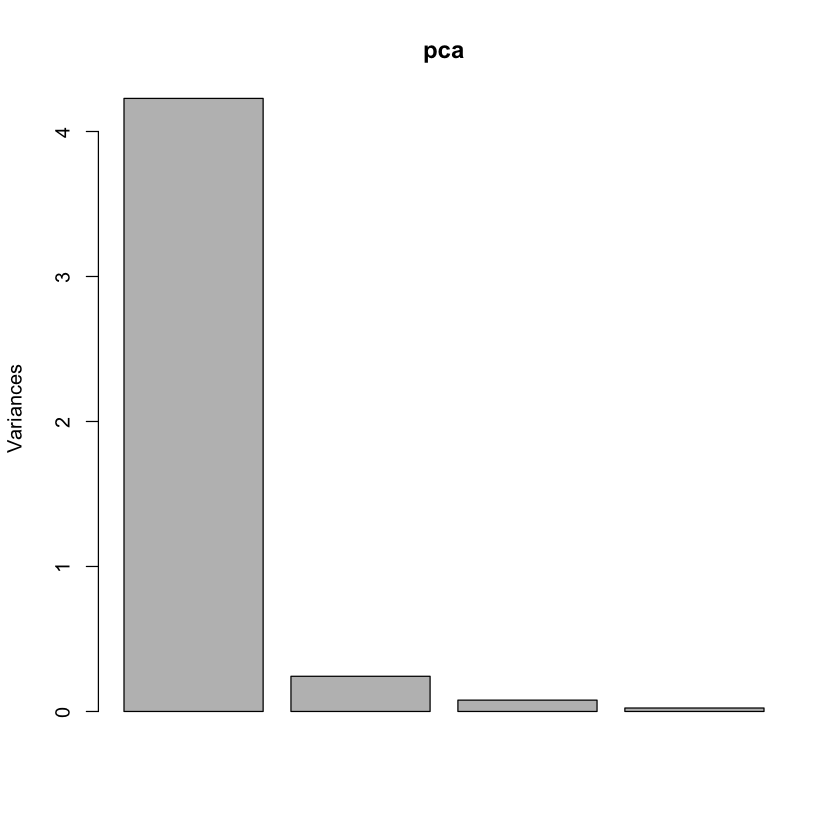

In [10]:
plot(pca)

Alternatively, the biplot command will plot the samples based on the PCA ordination and the vectors representing the input variables and how much explanation they represent along each axis.

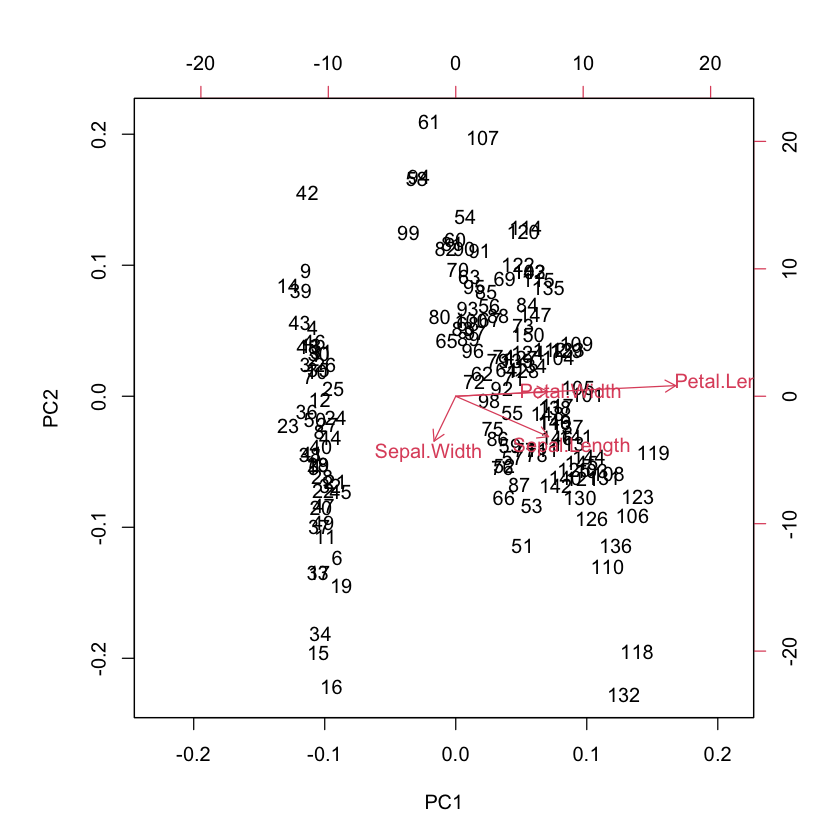

In [11]:
biplot(pca)

Now we are going to set our data up to plot using ggplot. The first step in this is to extract the coordinates of each sample along our PC axes. We can do this using the `scores()` command from vegan. The default output of this command will be a matrix where your samples are rows and the PC axes are the columns, so we add `as.data.frame()` to the command to force the output to a data frame format that can be easily merged with metadata later.

In [12]:
coordinates <- as.data.frame(scores(pca, display = "sites"))
head(coordinates)

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
site1,-2.684126,-0.3193972,0.02791483,0.002262437
site2,-2.714142,0.1770012,0.21046427,0.099026550
site3,-2.888991,0.1449494,-0.01790026,0.019968390
site4,-2.745343,0.3182990,-0.03155937,-0.075575817
site5,-2.728717,-0.3267545,-0.09007924,-0.061258593
site6,-2.280860,-0.7413304,-0.16867766,-0.024200858


If you want to plot a biplot, you will also need the arrow data from the PCA object. While the sample data is extracted using "sites", the vector data can be extracted using "species". 

In [13]:
arrows <- as.data.frame(scores(pca, display = "species"))
head(arrows)

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
Sepal.Length,0.36138659,-0.65658877,0.58202985,0.3154872
Sepal.Width,-0.08452251,-0.73016143,-0.59791083,-0.3197231
Petal.Length,0.85667061,0.17337266,-0.07623608,-0.4798390
Petal.Width,0.35828920,0.07548102,-0.54583143,0.7536574


Next we are going to add the metadata that we removed earlier before running the PCA to our data frame with our sample PC coordinates. In the case where you have designated sample IDs the best way to do this is using the `merge()` function (I will provide an example of that below). Because the iris dataset does not have designated sampleIDs to merge by, we are simply going to merge by using `cbind()` to bind the columns of the two files one after the other. 

In [14]:
merged_data <- cbind(iris, coordinates)
head(merged_data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
site1,5.1,3.5,1.4,0.2,setosa,-2.684126,-0.3193972,0.02791483,0.002262437
site2,4.9,3.0,1.4,0.2,setosa,-2.714142,0.1770012,0.21046427,0.099026550
site3,4.7,3.2,1.3,0.2,setosa,-2.888991,0.1449494,-0.01790026,0.019968390
site4,4.6,3.1,1.5,0.2,setosa,-2.745343,0.3182990,-0.03155937,-0.075575817
site5,5.0,3.6,1.4,0.2,setosa,-2.728717,-0.3267545,-0.09007924,-0.061258593
site6,5.4,3.9,1.7,0.4,setosa,-2.280860,-0.7413304,-0.16867766,-0.024200858


Now our dataframe is formatted and ready for ggplot. To plot our ordination, we can use the same methods as plotting a scatter plot, and since the one categorical variable we have is Species, we can color our points by Species. 

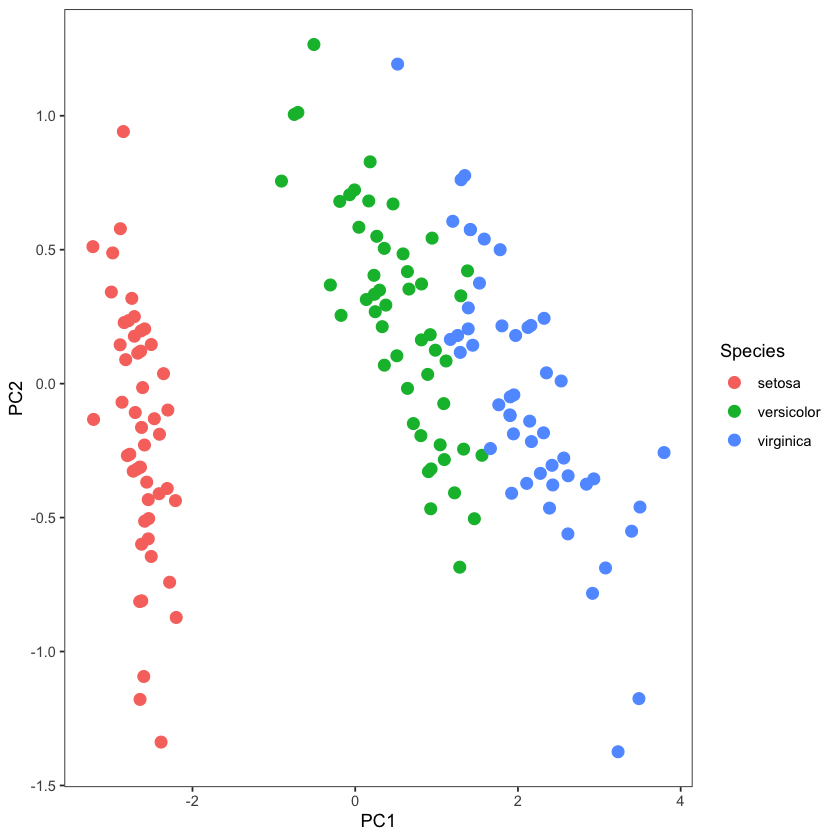

In [15]:
ggplot(merged_data, aes(PC1, PC2, color = Species)) + geom_point(size = 3)

Next we are going to add ellipses to our plot using `stat_ellipse()`. These will by default draw a ellipse around each group based on the 95% confidence interval. This command can also be adjusted aesthetically just like any of our geoms can. We can customize these ellipses by using terms like `lty =` for line type and `lwd =` for line width. 

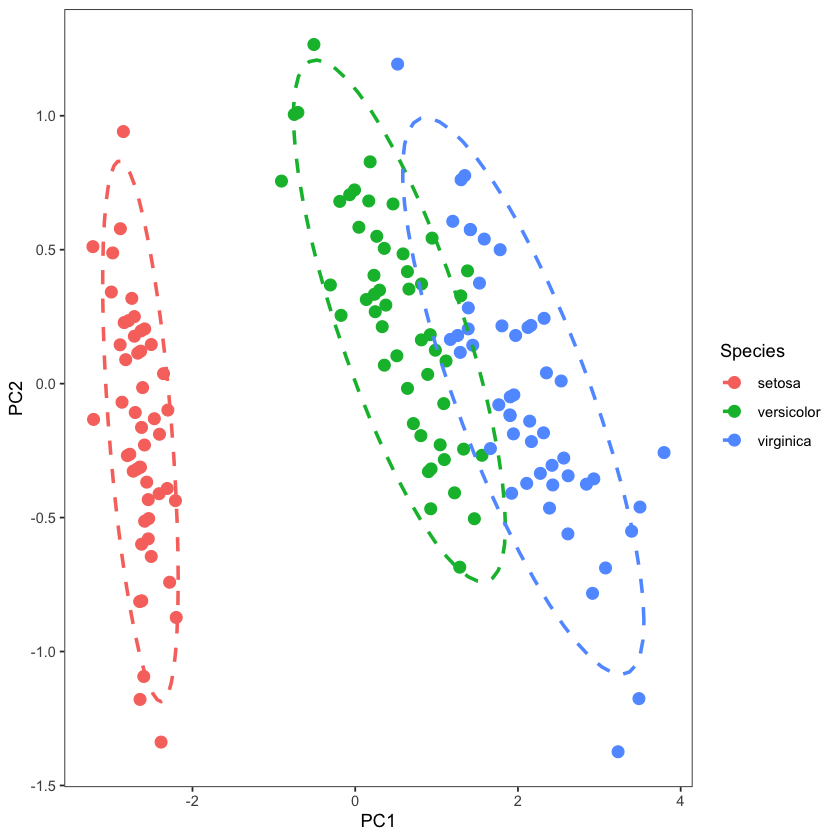

In [16]:
ggplot(merged_data, aes(PC1, PC2, color = Species)) + geom_point(size = 3) +
stat_ellipse(lty = 2, lwd = 1)

We can also change the shape of these ellipse to various ploygons to best illustrate our results if necessary. By changing the geom to polygon, we can now add a fill color using separate `aes()` parameters within `stat_ellipse()`. If the `segments = ` argument is left out, the polygon will automatically be an ellipse, but if a number is provided that will be the number of sides on the drawn shape. 

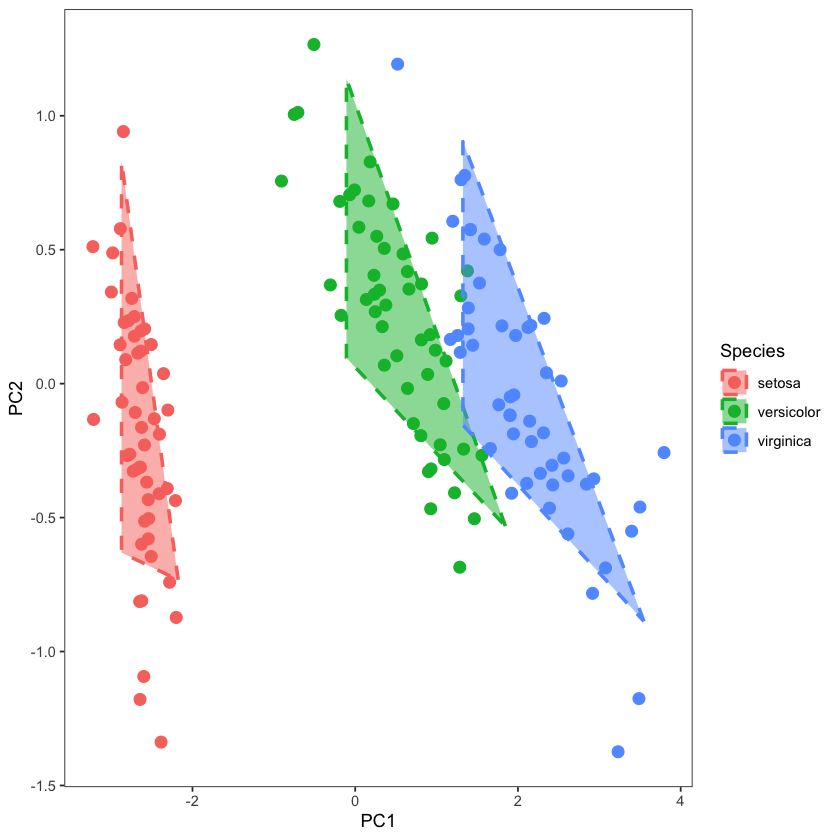

In [17]:
ggplot(merged_data, aes(PC1, PC2, color = Species)) + geom_point(size = 3) +
stat_ellipse(lty = 2, lwd = 1, geom = "polygon", aes(fill = Species), alpha = 0.5, 
             segments = 3)

Now lets plot a biplot by adding our explanatory variables to the plot. Lets start first with a base plot with points and ellipses. 

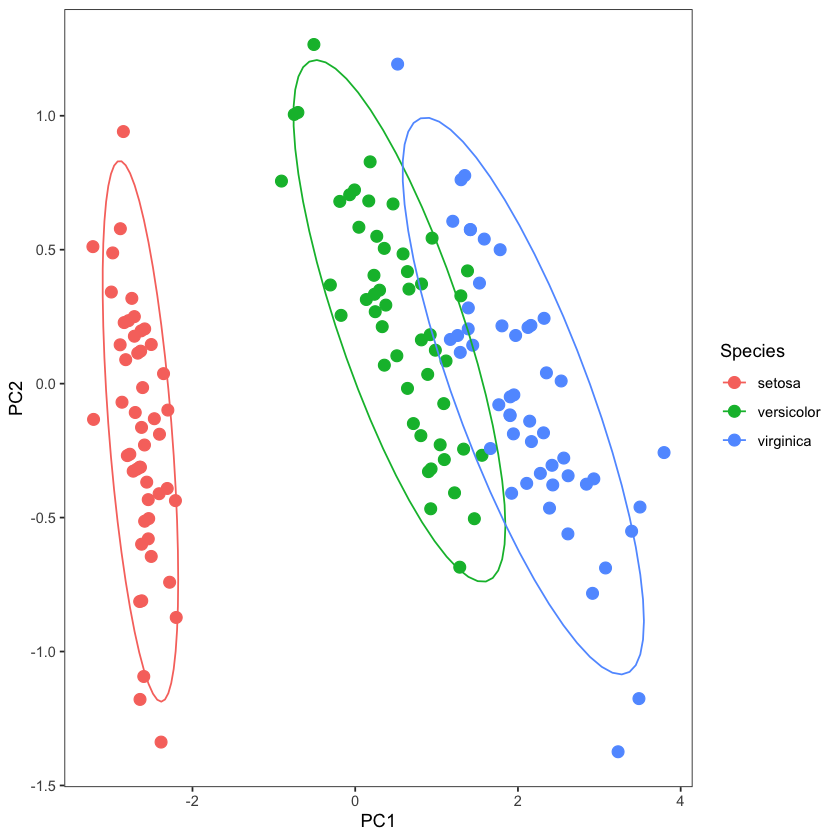

In [18]:
ggplot() + geom_point(data = merged_data, aes(PC1, PC2, color = Species), size = 3) + 
stat_ellipse(data = merged_data, aes(PC1, PC2, color = Species)) 

Now lets add lines for the explanatory variables using `geom_segment()`. This geom requires you to designate the start and end points of both the x and y for each variable. In our case the segments always start at the origin (0,0) and the end points are the PC1 and PC2 coordinates for each variable in the arrows object we generated above which contains the coordinate data for each vector in the PCA.

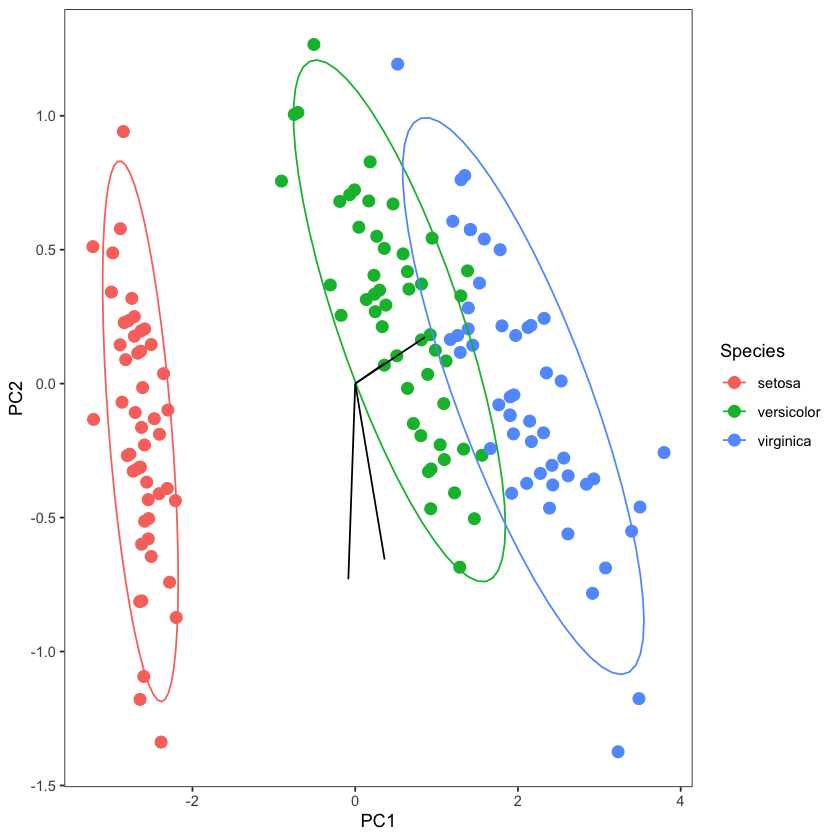

In [19]:
ggplot() + geom_point(data = merged_data, aes(PC1, PC2, color = Species), size = 3) + 
stat_ellipse(data = merged_data, aes(PC1, PC2, color = Species)) +
geom_segment(data = arrows, aes(x = 0, y = 0, xend = PC1, yend = PC2))

Now we want to make our segements arrows. To do this we add the arrow function to the `geom_segment()` command outside of the `aes()` section. The `length =` function allows us to designate how long the arrow head should be and what units it should be.

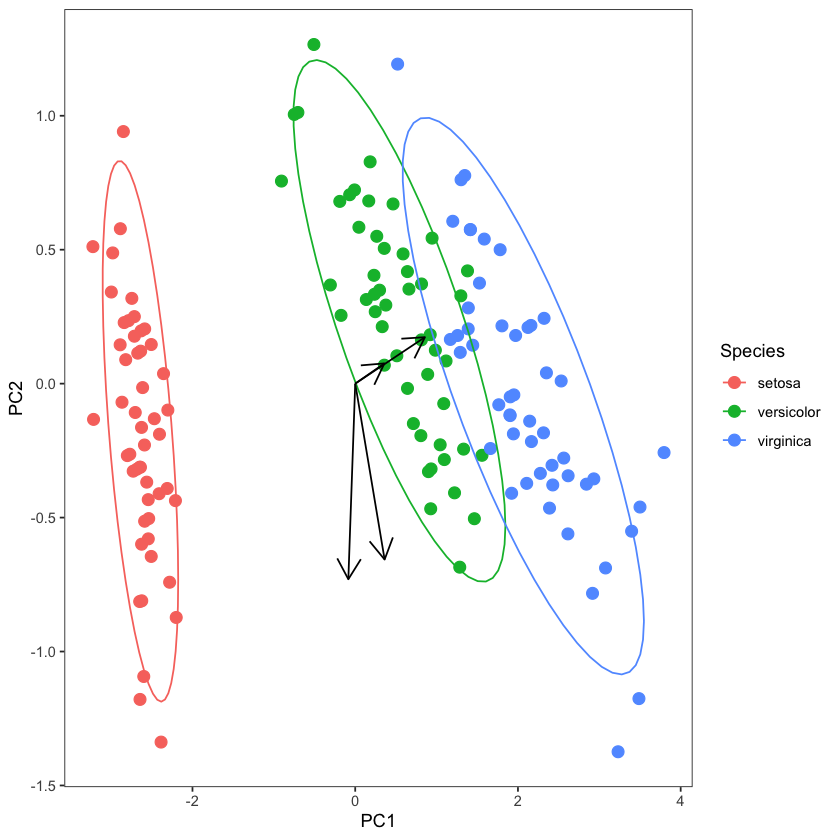

In [20]:
ggplot() + geom_point(data = merged_data, aes(PC1, PC2, color = Species), size = 3) + 
stat_ellipse(data = merged_data, aes(PC1, PC2, color = Species)) +
geom_segment(data = arrows, aes(x = 0, y = 0, xend = PC1, yend = PC2), arrow = arrow(length = unit(0.5, "cm")))

Now let's label these arrows by each variable they represent. There are two ways of doing this. The first, `geom_text()`, will add a text label with no background to the designated coordinates and the text to input is designated in `aes()` by `label =`. 

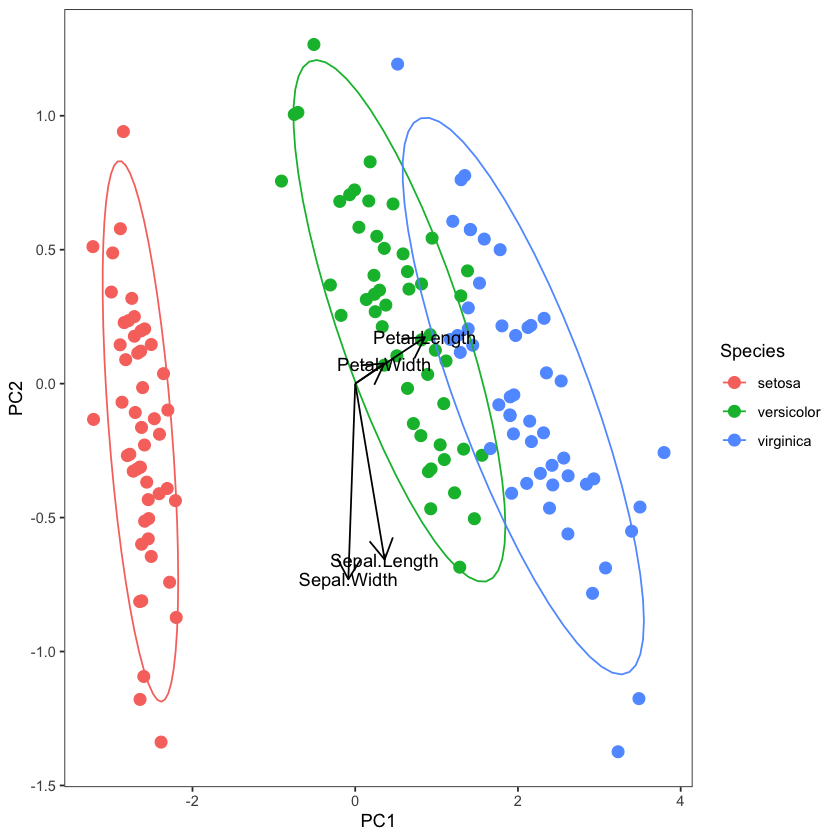

In [21]:
ggplot() + geom_point(data = merged_data, aes(PC1, PC2, color = Species), size = 3) + 
stat_ellipse(data = merged_data, aes(PC1, PC2, color = Species)) +
geom_segment(data = arrows, aes(x = 0, y = 0, xend = PC1, yend = PC2), arrow = arrow(length = unit(0.5, "cm"))) +
geom_text(data = arrows, aes(PC1, PC2, label = rownames(arrows)))

In the case that you want your labels to have a box with a background to provide better contrast for reading labels on top of points, we use `geom_label()` and use variables like "fill", "alpha", and "color" to adjust the appearance of the label.

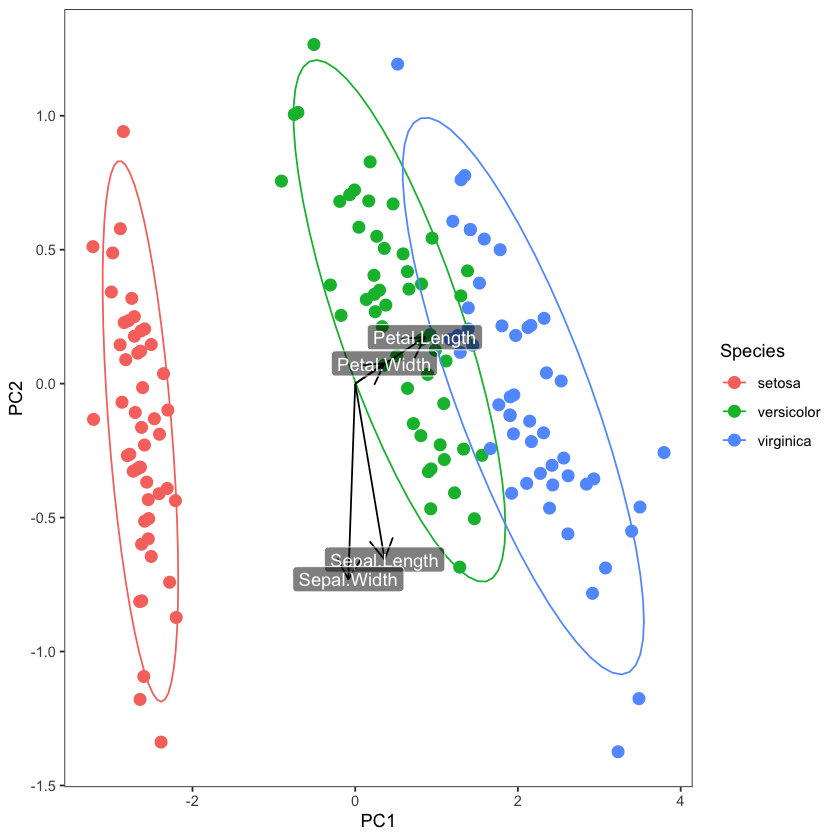

In [22]:
ggplot() + geom_point(data = merged_data, aes(PC1, PC2, color = Species), size = 3) + 
stat_ellipse(data = merged_data, aes(PC1, PC2, color = Species)) +
geom_segment(data = arrows, aes(x = 0, y = 0, xend = PC1, yend = PC2), arrow = arrow(length = unit(0.5, "cm"))) +
geom_label(data = arrows, aes(PC1, PC2, label = rownames(arrows)), fill = "black", color = "white", alpha = 0.5)

Finally, you may want to change the names of your axes in your ordination to reflect the proportion variance explained. To customize your axis titles we use `xlab()` and `ylab()`. Inside of the parentheses we can put whatever we want our axis title to be in double quotes. 

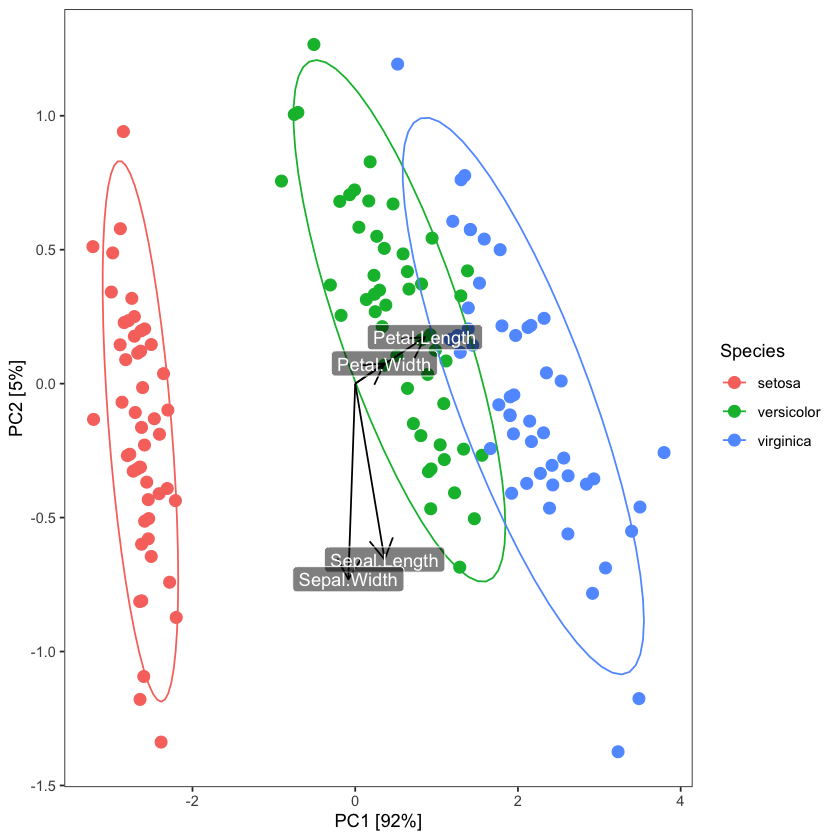

In [23]:
ggplot() + geom_point(data = merged_data, aes(PC1, PC2, color = Species), size = 3) + 
stat_ellipse(data = merged_data, aes(PC1, PC2, color = Species)) +
geom_segment(data = arrows, aes(x = 0, y = 0, xend = PC1, yend = PC2), arrow = arrow(length = unit(0.5, "cm"))) +
geom_label(data = arrows, aes(PC1, PC2, label = rownames(arrows)), fill = "black", color = "white", alpha = 0.5) +
xlab("PC1 [92%]") + ylab("PC2 [5%]")

If you need to adjust the spacing of the axis title placement you can use regular expression characters to do so, particulary the character for linebreak (\n). By placing `\n` anywhere in the title you can tell ggplot where to insert a line break, in the beginning, end, or somewhere in the middle.

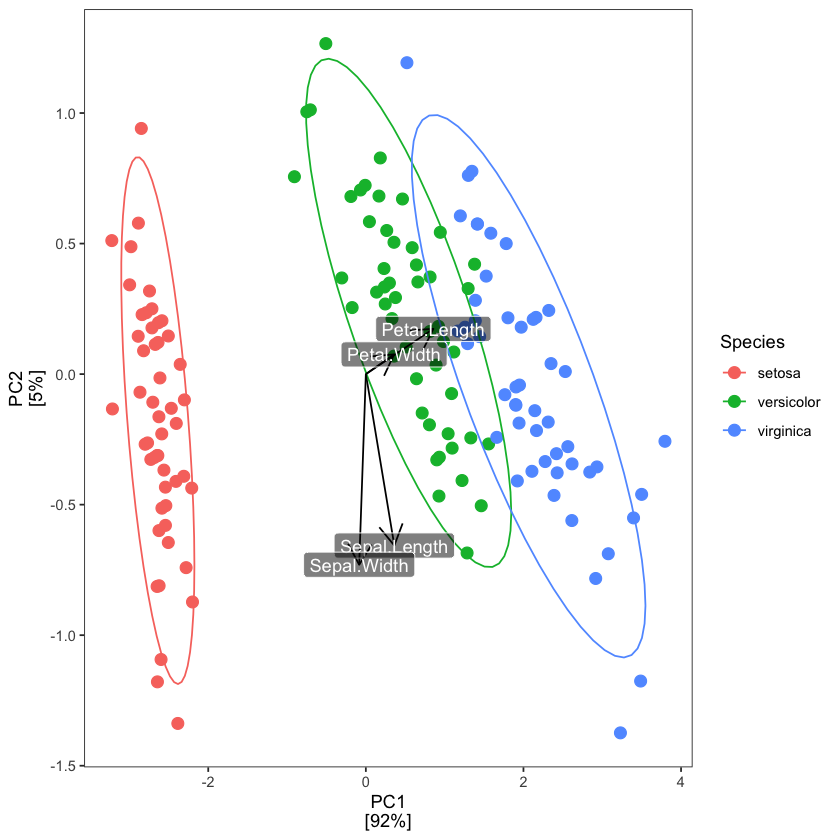

In [24]:
ggplot() + geom_point(data = merged_data, aes(PC1, PC2, color = Species), size = 3) + 
stat_ellipse(data = merged_data, aes(PC1, PC2, color = Species)) +
geom_segment(data = arrows, aes(x = 0, y = 0, xend = PC1, yend = PC2), arrow = arrow(length = unit(0.5, "cm"))) +
geom_label(data = arrows, aes(PC1, PC2, label = rownames(arrows)), fill = "black", color = "white", alpha = 0.5) +
xlab("PC1\n[92%]") + ylab("PC2\n[5%]")

<a name = 3></a>
### Line plot
Line and area plots can be useful for time series data. So for this section we will use the economics dataset. We will start by using the `head()` command to preview the dataset.

In [25]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


Next we will plot a basic line plot of unemployment by date.

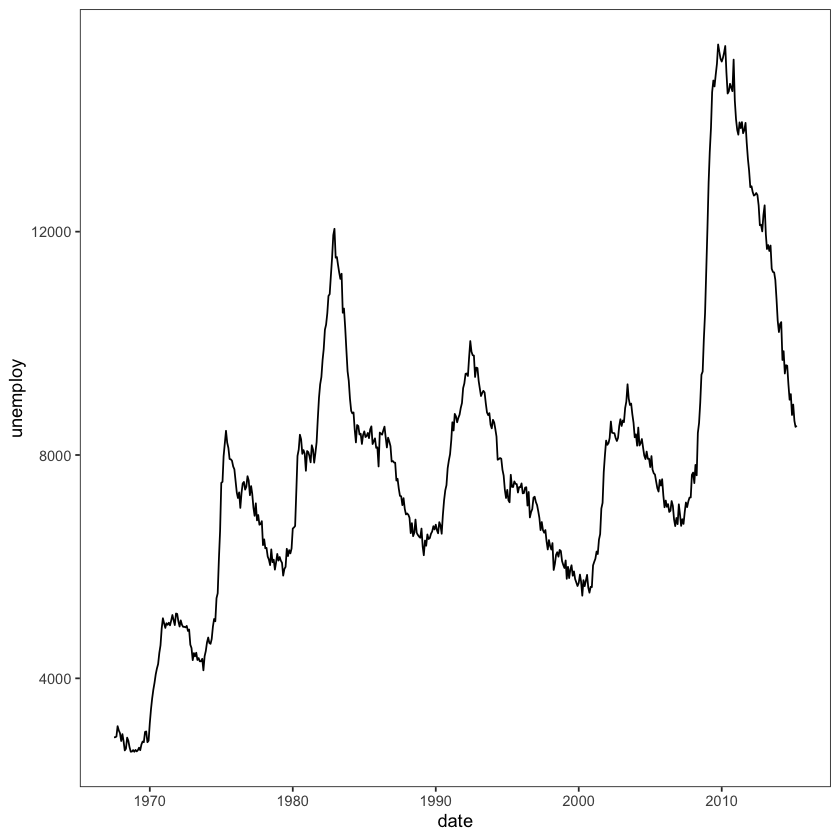

In [26]:
ggplot(economics, aes(date, unemploy)) + geom_line()

If we want to plot multiple lines there are two ways to do this. First, we can use `geom_line()` twice as shown below.

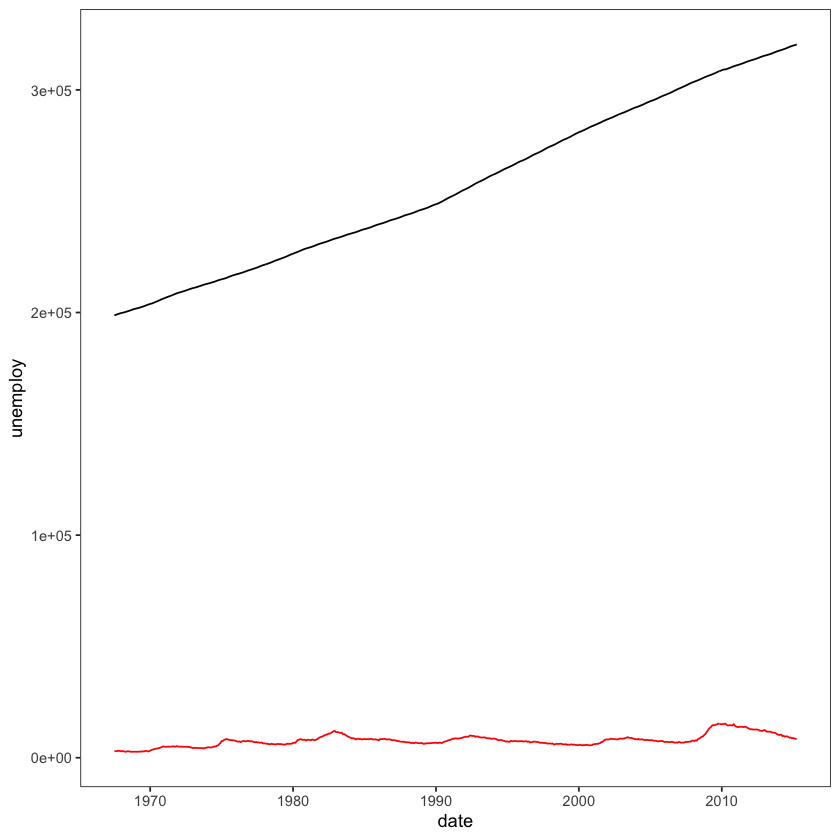

In [27]:
ggplot(economics) + geom_line(aes(date, unemploy), color = "red") + 
geom_line(aes(date, pop), color = "black")

The second way to do this involves first reformatting our table to have the column variables represented in a single column. We can do this easily using the `melt()` function from the reshape2 package. In the melt function I designate "date" as an ID so as to not collapse that variable.

In [28]:
econ_long <- melt(economics, id = "date")
head(econ_long)

,date,variable,value
,<date>,<fct>,<dbl>
1,1967-07-01,pce,506.7
2,1967-08-01,pce,509.8
3,1967-09-01,pce,515.6
4,1967-10-01,pce,512.2
5,1967-11-01,pce,517.4
6,1967-12-01,pce,525.1


Now, all of our measured variables are in the column called "variable" and the measured values are in a column called "value". We can now plot all of these variables in a single plot and color the lines by variable as shown below.

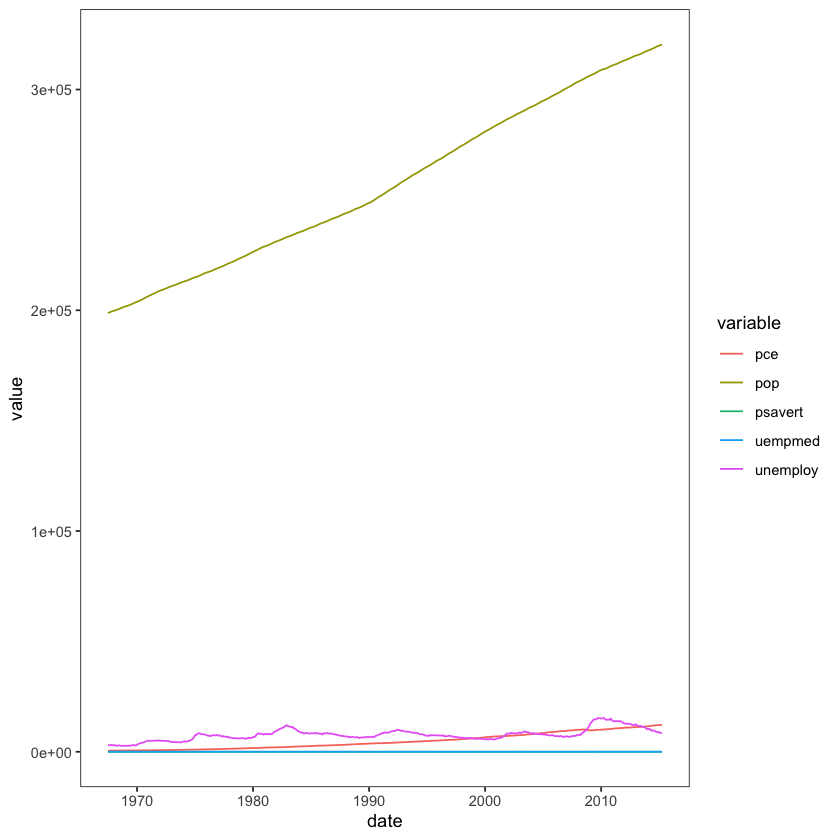

In [29]:
ggplot(econ_long, aes(date, value, color = variable)) + geom_line()

<a name = 4></a>
### Area plot
An area plot it very similar to a line plot but will fill the area in beneath the line by switching `geom_line()` to `geom_area()`.

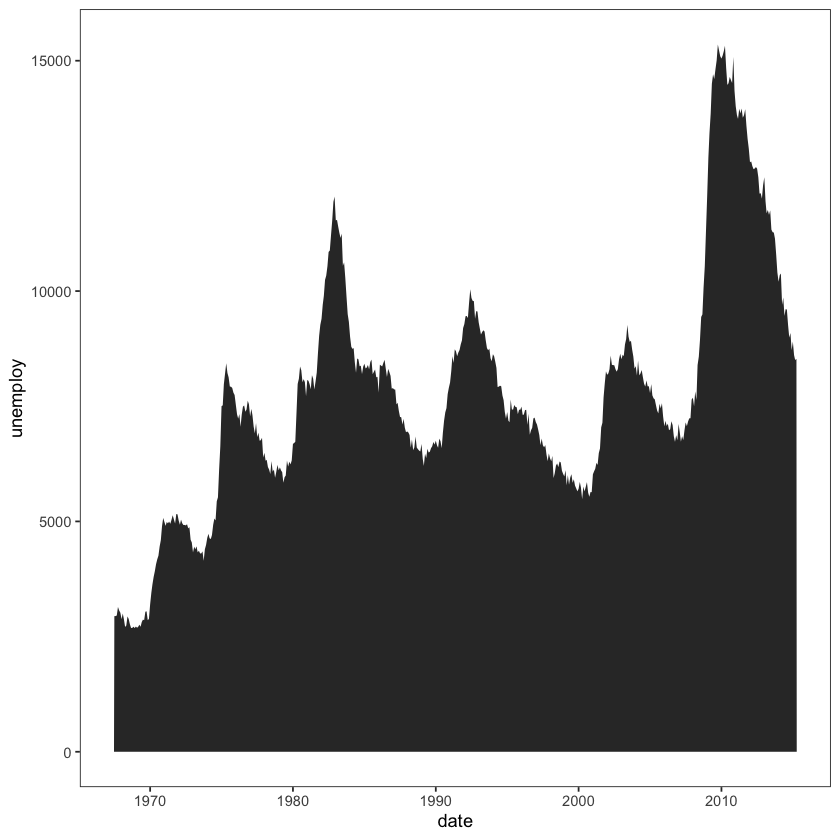

In [30]:
ggplot(economics, aes(date, unemploy)) + geom_area()

<a name = 5></a>
### Stacked area plot
For a stacked area plot we will use the long format dataframe generated above and format the plot command exactly the same but switching again `geom_line()` for `geom_area()` and switching color to fill.

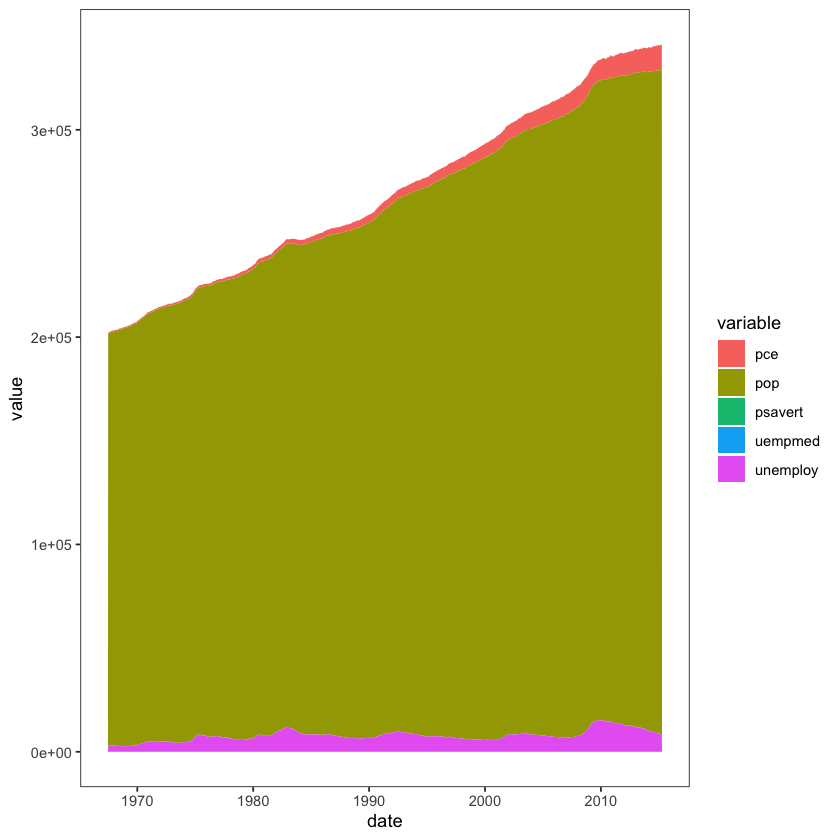

In [31]:
ggplot(econ_long, aes(date, value, fill = variable)) + geom_area()